1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether or not there is a tsunami with the 'mb' magType.

Text(0.5, 1.0, 'Correlation between earthquakes magnitude and whether\nthere was a tsunami with the magType of mb')

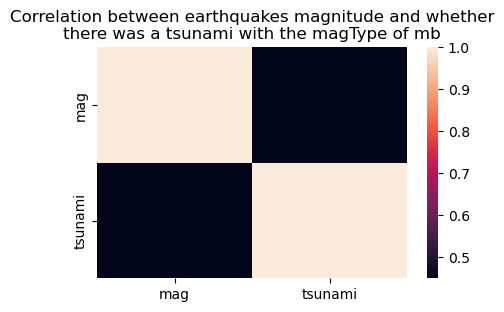

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

eq = pd.read_csv(r'C:\Users\bharo\OneDrive\Documents\earthquakes.csv')
df = eq.query('magType == "mb"')[['mag','tsunami']].corr()
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(df)
plt.title('Correlation between earthquakes magnitude and whether\nthere was a tsunami with the magType of mb')


2.Create a box plot of Facebook volume traded and closing price and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5.

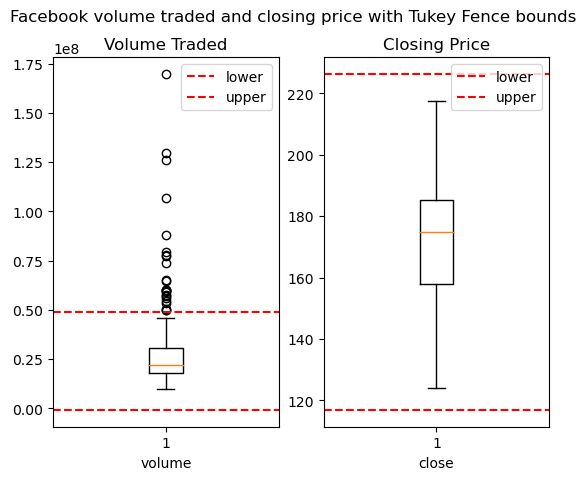

In [4]:
fb =  pd.read_csv(r'C:\Users\bharo\OneDrive\Documents\fb_stock_prices_2018.csv',index_col='date', parse_dates=True)
plt.subplot(1, 2, 1)
cols = ['volume']
subset = fb[cols]
quantiles = subset.quantile([0.25, 0.75])
iqr = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]
stats = quantiles[cols]
x = [stats.loc[0.25] - (1.5 * iqr)]
y = [stats.loc[0.75] + (1.5 * iqr)]
plt.boxplot(subset)
plt.axhline(x,color = 'r', linestyle ='dashed',label= 'lower')
plt.axhline(y, color = 'r', linestyle ='dashed', label = 'upper')

plt.xlabel('volume')
plt.title('Volume Traded')
plt.legend()

plt.subplot(1, 2, 2)
cols = ['close']
subset = fb[cols]
quantiles = subset.quantile([0.25, 0.75])
iqr = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]
stats = quantiles[cols]
lower = [stats.loc[0.25] - (1.5 * iqr)]
upper = [stats.loc[0.75] + (1.5 * iqr)]
plt.boxplot(subset)
plt.axhline(lower,color = 'r', linestyle ='dashed',label= 'lower')
plt.axhline(upper, color = 'r', linestyle ='dashed', label = 'upper')
plt.title('Closing Price')
plt.xlabel('close')
plt.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds')
plt.show()


3. Fill in the area inside the bounds in the plot from exercise 2.


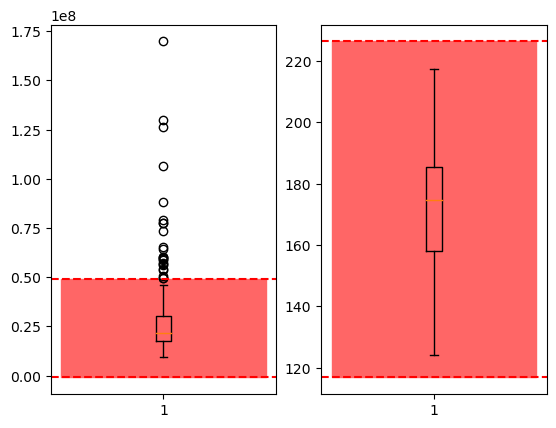

In [5]:
plt.subplot(1,2,1)
subset = fb['volume']
Q1 = fb['volume'].quantile(0.25)
Q3 = fb['volume'].quantile(0.75)
IQR = Q3 - Q1
X = Q1- (1.5 * IQR)
Y = Q3 + (1.5 * IQR)
plt.boxplot(subset)
plt.axhline(X,color = 'r', linestyle ='dashed',label= 'lower')
plt.axhline(Y, color = 'r', linestyle ='dashed', label = 'upper')
plt.fill_between([0,2],X, Y,  color='#ff6666')

plt.subplot(1,2,2)
subset = fb['close']
Q1 = fb['close'].quantile(0.25)
Q3 = fb['close'].quantile(0.75)
IQR = Q3 - Q1
X = Q1- (1.5 * IQR)
Y = Q3 + (1.5 * IQR)
plt.boxplot(subset)
plt.axhline(X,color = 'r', linestyle ='dashed',label= 'lower')
plt.axhline(Y, color = 'r', linestyle ='dashed', label = 'upper')

plt.fill_between([0,2], X, Y,color='#ff6666')

4.Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31' marking the large decline in Facebook price on a line graph of closing price.

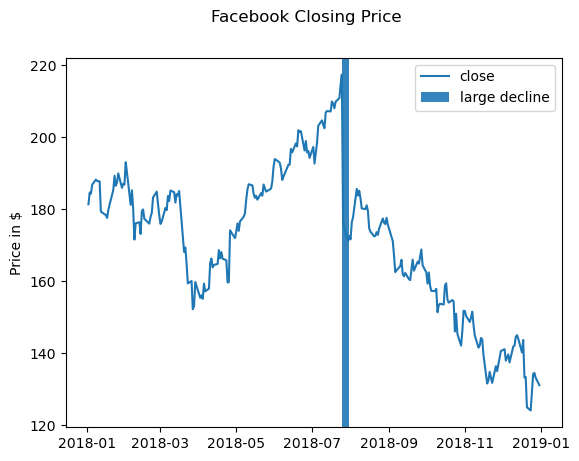

In [6]:
subset = fb['close']
plt.plot(subset,label='close')
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.9, label='large decline')
plt.ylabel('Price in $')
plt.suptitle('Facebook Closing Price')
plt.legend()

5. Using the Facebook stock data, annotate the following three events on a line graph of closing price:

Text(2018-03-20, 168.15, 'FTC launches investigation')

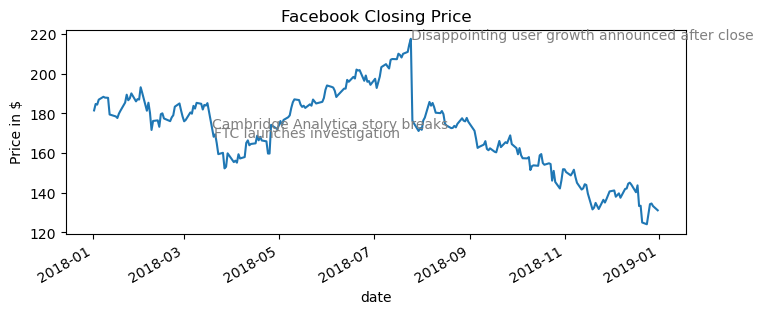

In [7]:
ax = fb.close.plot(title='Facebook Closing Price',figsize = (8,3) )
plt.ylabel ('Price in $')
style = dict(size=10, color='gray')
ax.text('2018-07-25',217.50 , "Disappointing user growth announced after close",**style)
ax.text('2018-03-19',172.56 , "Cambridge Analytica story breaks",**style)
ax.text('2018-03-20',168.15 , "FTC launches investigation",**style)

6. Modify the reg_resid_plot() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, you should pick a qualitative colormap or make your own.

[<AxesSubplot:xlabel='close', ylabel='volume'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>,
 <AxesSubplot:xlabel='volume', ylabel='close'>,
 <AxesSubplot:xlabel='volume', ylabel='residuals'>]

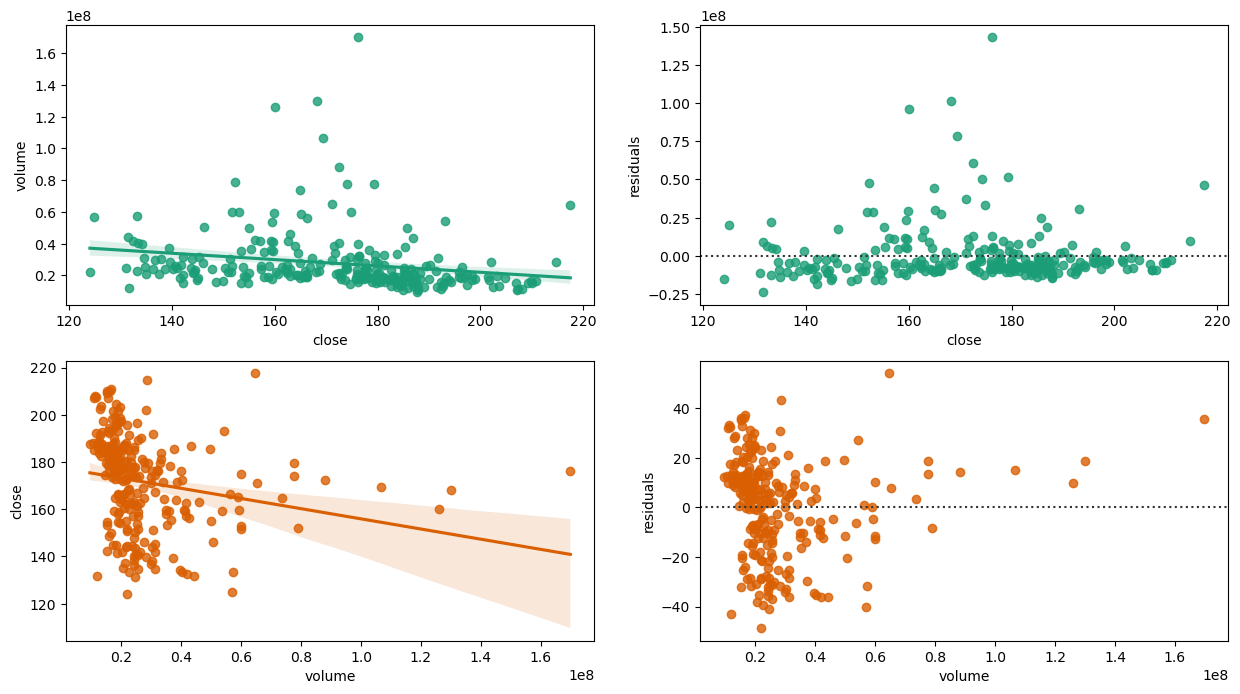

In [10]:
# 'hands_on DatabAnalysis with Pandas, page 316'
import itertools
def reg_resid_plots(data):
    
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count,2, figsize=(15, 8) )

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            
            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')

    return fig.axes
reg_resid_plots(fb[['close', 'volume']])